# Import defualt neccessary package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
# preprocessing
data = pd.read_csv('../data/left_foot_data.csv')
data = data.drop(['order'], axis=1) 
data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height
0,Normal,23.700,20.491,8.038,16.799,14.899,9.661,5.149,10.246,2.95
1,Normal,25.805,21.077,8.417,18.155,16.506,10.358,6.057,10.589,3.61
2,High,22.315,19.182,7.381,16.145,14.155,9.515,5.680,9.591,3.54
3,Normal,23.366,19.556,7.191,17.045,14.642,8.949,5.698,9.778,3.52
4,High,21.323,18.338,6.821,15.635,14.316,8.507,5.337,9.169,3.39
5,Flat,23.786,20.606,7.946,17.446,15.679,9.785,5.408,10.303,3.34
6,Flat,22.652,19.242,7.362,16.919,14.624,8.516,4.966,9.621,3.03
7,Flat,23.058,18.924,7.528,16.397,14.595,8.955,5.037,9.462,2.70
8,High,24.949,21.021,8.581,18.168,15.908,10.000,5.874,10.511,3.48
9,High,22.089,18.893,7.515,16.247,14.124,9.978,5.106,9.447,3.47


In [4]:
# Encode label type
clean_up = {'foot_type':{'Normal': 0, 'Flat': 1, 'High': 2}}
encoded_data = data.replace(clean_up)
encoded_data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height
0,0,23.700,20.491,8.038,16.799,14.899,9.661,5.149,10.246,2.95
1,0,25.805,21.077,8.417,18.155,16.506,10.358,6.057,10.589,3.61
2,2,22.315,19.182,7.381,16.145,14.155,9.515,5.680,9.591,3.54
3,0,23.366,19.556,7.191,17.045,14.642,8.949,5.698,9.778,3.52
4,2,21.323,18.338,6.821,15.635,14.316,8.507,5.337,9.169,3.39
5,1,23.786,20.606,7.946,17.446,15.679,9.785,5.408,10.303,3.34
6,1,22.652,19.242,7.362,16.919,14.624,8.516,4.966,9.621,3.03
7,1,23.058,18.924,7.528,16.397,14.595,8.955,5.037,9.462,2.70
8,2,24.949,21.021,8.581,18.168,15.908,10.000,5.874,10.511,3.48
9,2,22.089,18.893,7.515,16.247,14.124,9.978,5.106,9.447,3.47


In [5]:
# Calculate SI & CSI
encoded_data['SI'] = data['middle_foot_width']/data['heel_width']
encoded_data['CSI'] = data['middle_foot_width']/data['apex1_to_apex5']
encoded_data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height,SI,CSI
0,0,23.700,20.491,8.038,16.799,14.899,9.661,5.149,10.246,2.95,1.561080,0.832005
1,0,25.805,21.077,8.417,18.155,16.506,10.358,6.057,10.589,3.61,1.389632,0.812609
2,2,22.315,19.182,7.381,16.145,14.155,9.515,5.680,9.591,3.54,1.299472,0.775723
3,0,23.366,19.556,7.191,17.045,14.642,8.949,5.698,9.778,3.52,1.262022,0.803553
4,2,21.323,18.338,6.821,15.635,14.316,8.507,5.337,9.169,3.39,1.278059,0.801810
5,1,23.786,20.606,7.946,17.446,15.679,9.785,5.408,10.303,3.34,1.469305,0.812059
6,1,22.652,19.242,7.362,16.919,14.624,8.516,4.966,9.621,3.03,1.482481,0.864490
7,1,23.058,18.924,7.528,16.397,14.595,8.955,5.037,9.462,2.70,1.494540,0.840648
8,2,24.949,21.021,8.581,18.168,15.908,10.000,5.874,10.511,3.48,1.460844,0.858100
9,2,22.089,18.893,7.515,16.247,14.124,9.978,5.106,9.447,3.47,1.471798,0.753157


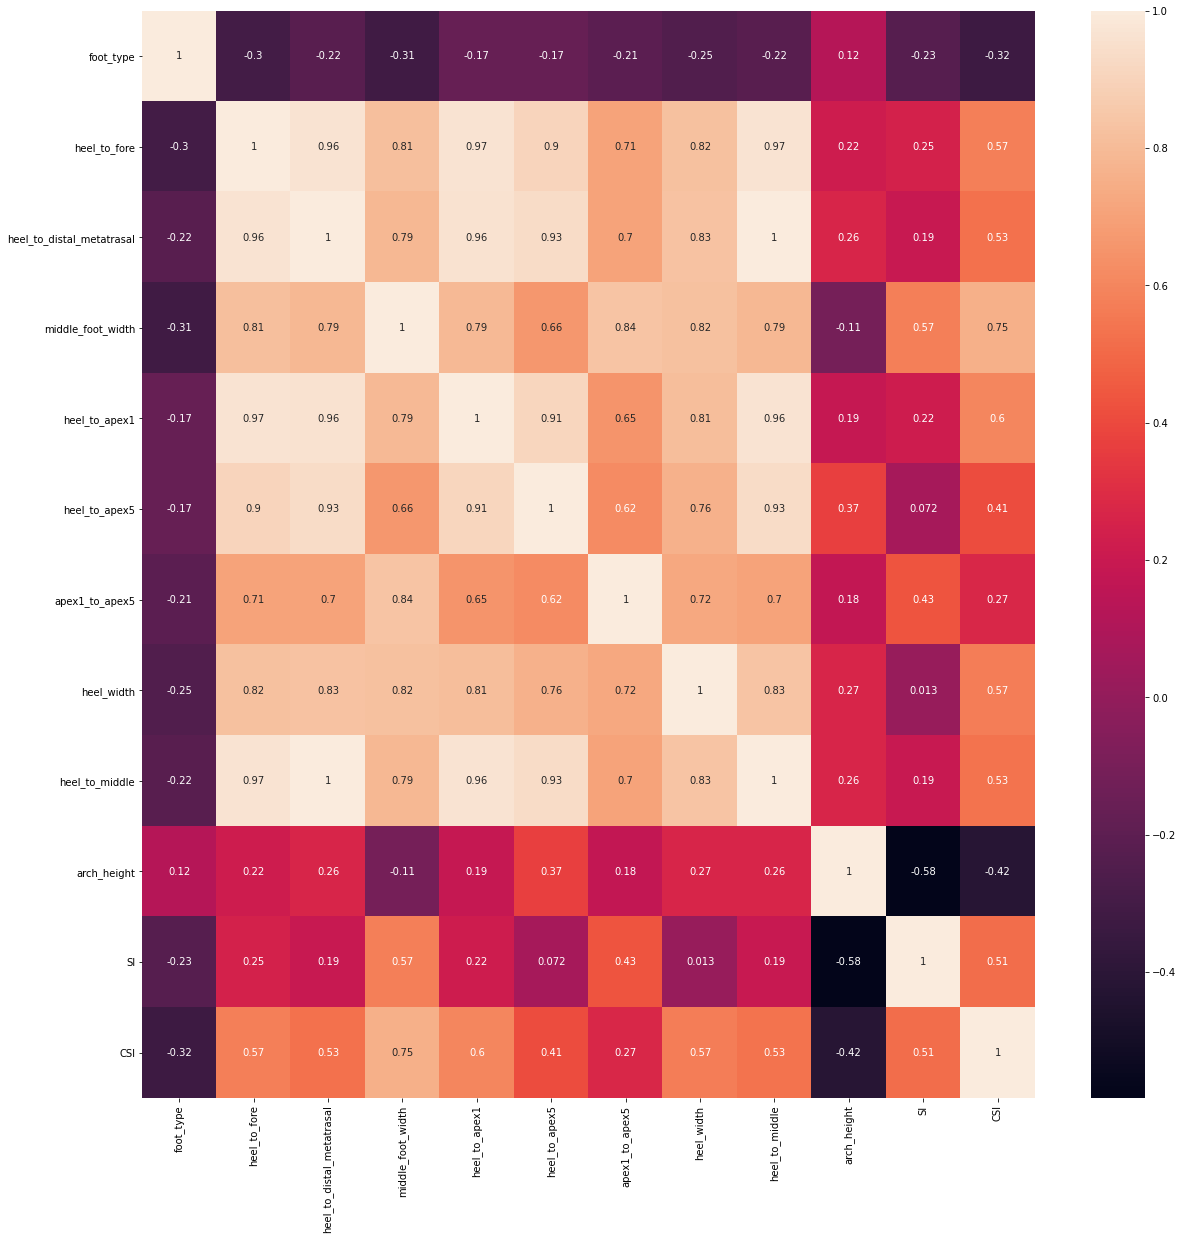

In [6]:
corrmat = encoded_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(encoded_data[top_corr_features].corr(),annot=True)

In [7]:
# Select only features that have correlation with arch height more tham 0.26 
selected_feature = ['heel_to_distal_metatrasal', 'heel_to_apex5', 'heel_width', 'heel_to_middle', 'SI', 'CSI']
features = encoded_data[selected_feature]
target = encoded_data[['arch_height']]

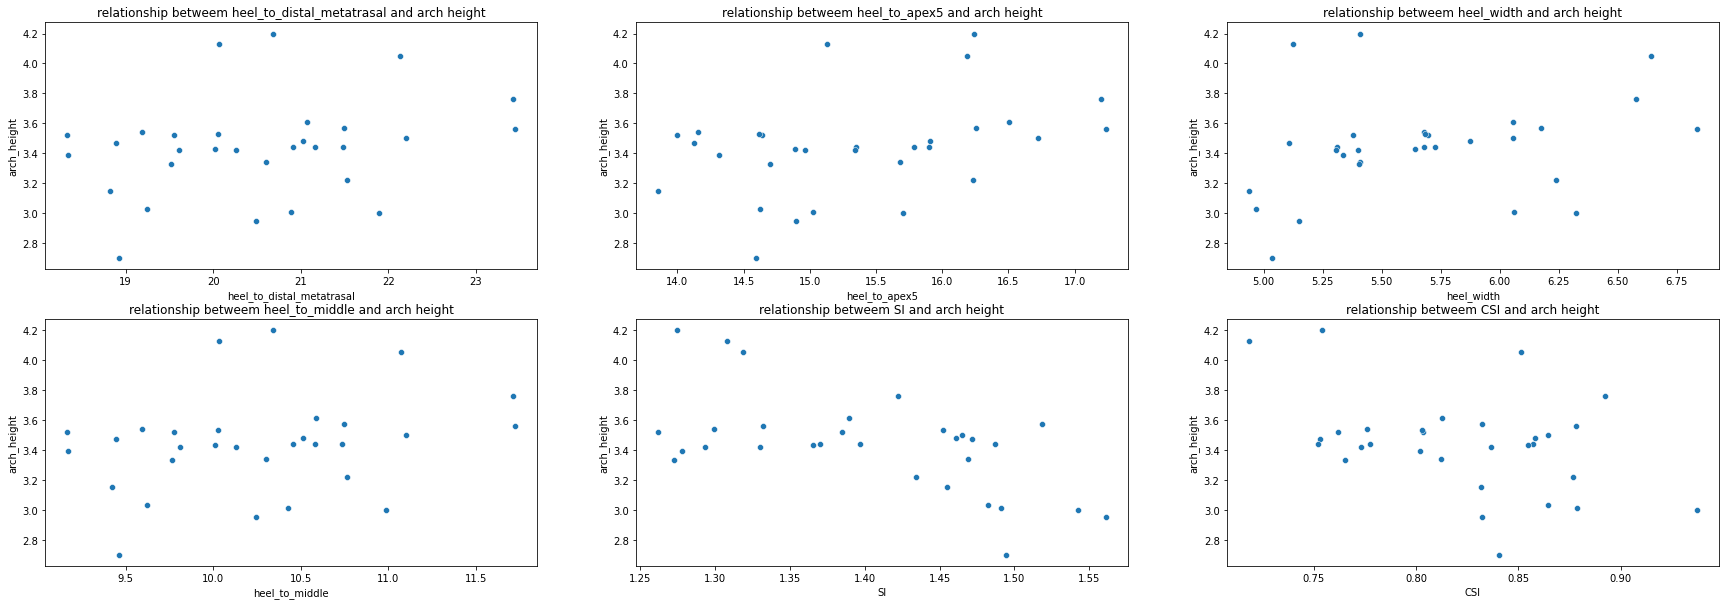

In [8]:
# Check data trend
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(30, 10))
column = 0
row = 0
for feature in selected_feature:
    sns.scatterplot(data=encoded_data, x=feature, y="arch_height", ax=axes[row][column])
    axes[row][column].set_title((
    f'relationship betweem {feature} and arch height'
    ))
    column += 1
    if(column == 3):
        row = 1
        column = 0
# sns.scatterplot(data=tips, x="total_bill", y="tip")

### Summary
All relationships is almost linear relationship, so we should not use polynomial regression on this dataset.

In [9]:
# Split train and test
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, random_state=42)

In [10]:
features

,heel_to_distal_metatrasal,heel_to_apex5,heel_width,heel_to_middle,SI,CSI
0,20.491,14.899,5.149,10.246,1.561080,0.832005
1,21.077,16.506,6.057,10.589,1.389632,0.812609
2,19.182,14.155,5.680,9.591,1.299472,0.775723
3,19.556,14.642,5.698,9.778,1.262022,0.803553
4,18.338,14.316,5.337,9.169,1.278059,0.801810
5,20.606,15.679,5.408,10.303,1.469305,0.812059
6,19.242,14.624,4.966,9.621,1.482481,0.864490
7,18.924,14.595,5.037,9.462,1.494540,0.840648
8,21.021,15.908,5.874,10.511,1.460844,0.858100
9,18.893,14.124,5.106,9.447,1.471798,0.753157


# Model selection
- linear regression
- Polynomial regression
- Decision tree regression
- Elasticnet regression
- NeuralNetwork Regression
- Lasso regression
- Ridge regression
- SVM

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear regression

Mean Absolute Error: 0.32208861414222706
Mean Square Error: 0.1193288229846456
r2 score: -0.44310589473503215


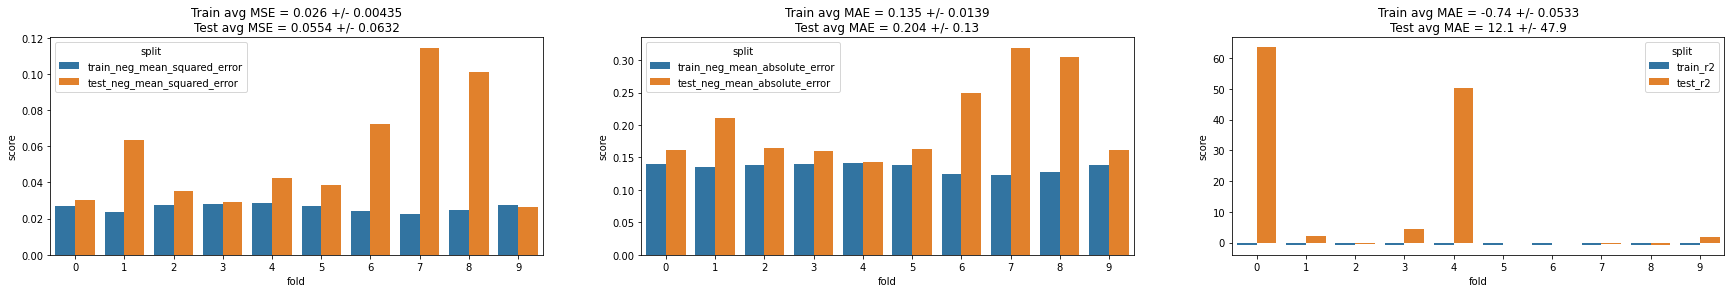

In [12]:
from sklearn.linear_model import LinearRegression
# Linear Regression
model = make_pipeline(
    PolynomialFeatures(degree=1),
    preprocessing.StandardScaler(),
    LinearRegression())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Train avg MAE = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Polynomial regrssion

Mean Absolute Error: 0.9379284807927352
Mean Square Error: 1.4353595128582566
r2 score: -16.35855363574888


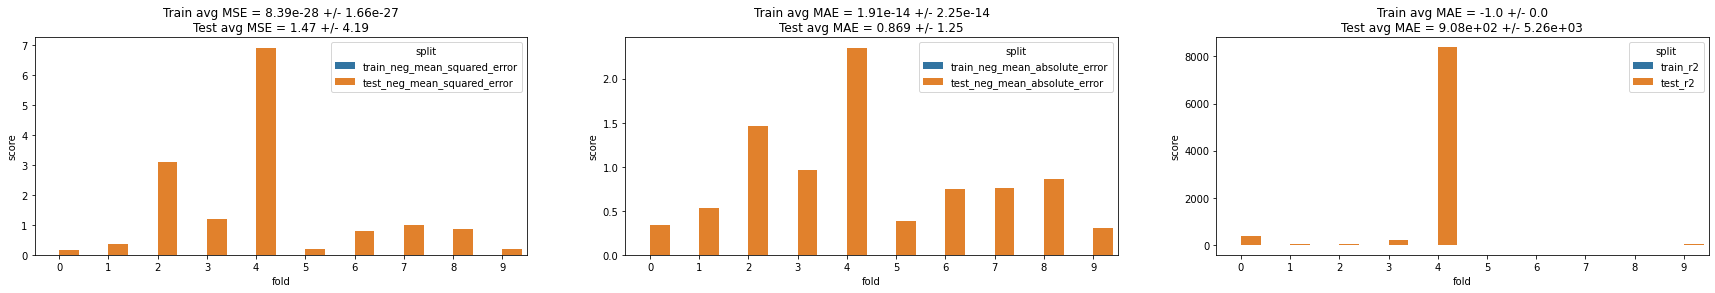

In [13]:
from sklearn.linear_model import LinearRegression
# Linear Regression
model = make_pipeline(
    PolynomialFeatures(degree=4),
    preprocessing.StandardScaler(),
    LinearRegression())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Train avg MAE = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Decision tree regression

Mean Absolute Error: 0.6666666666666666
Mean Square Error: 0.47819999999999996
r2 score: -4.783122816447194


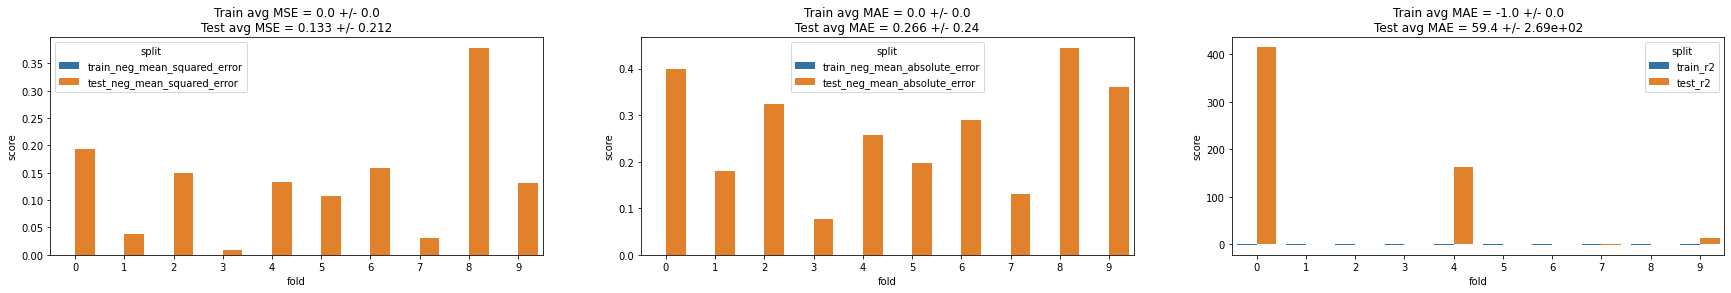

In [15]:
from sklearn.tree import DecisionTreeRegressor

model = make_pipeline(
    PolynomialFeatures(degree=1),
    preprocessing.StandardScaler(),
    DecisionTreeRegressor())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Train avg MAE = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))